In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

### Load dataset

In [4]:
df = pd.read_excel('Default.xlsx')
# factorize() returns two objects: a label array and an array with the unique values.
# I am interested in the first object. 
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head(3)

/home/saad/.local/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,default,student,balance,income,default2,student2
0,1,No,No,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,0,1
2,3,No,No,1073.549164,31767.138947,0,0


## Logistic Regression (using sklearn)

In [24]:
X_train = df.balance.values.reshape(-1,1)
y = df.default2
#creating test data
X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')#‘newton-cg’ handle L2 or no penalty 
clf.fit(X_train, y)
prob = clf.predict_proba(X_test)

### Interpretation of Newton's Method (used in above cell)
The geometric interpretation of Newton's method is that at each iteration one approximates f(x) by a quadratic function around xn, and then takes a step towards the maximum/minimum of that quadratic function (in higher dimensions, this may also be a saddle point). Note that if f(x) happens to be a quadratic function, then the exact extremum is found in one step.

source: https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions

/home/saad/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


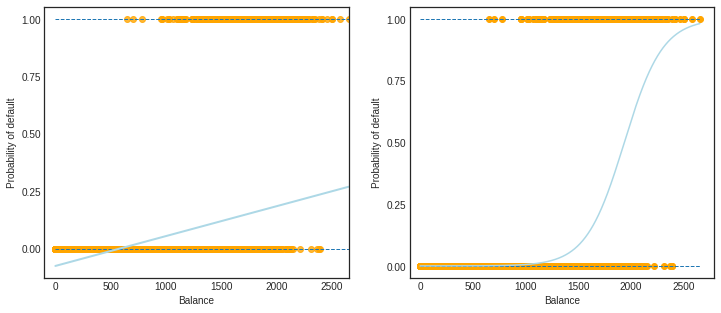

In [62]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.regplot(df.balance, df.default2, order=1, ci=None,
            scatter_kws={'color':'orange'},
            line_kws={'color':'lightblue', 'lw':2}, ax=ax1)

ax2.scatter(X_train,y,color='orange')
ax2.plot(X_test,prob[:,-1], color = 'lightblue') #fetch all rows and the last colm.

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    
    ax.set_ylabel('Probability of default')
    ax.set_xlabel('Balance')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(xmin=-100)

In [64]:
#experiments
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[:,-1]

array([3, 6, 9])

In [65]:
y = df.default2

In [69]:
print(clf)
print('Classes: ', clf.classes_)
print("Coefficients: ",clf.coef_)
print("Intercept: ",clf.intercept_)

LogisticRegression(solver='newton-cg')
Classes:  [0 1]
Coefficients:  [[0.00549892]]
Intercept:  [-10.65132784]


Another library which is more comprehensive for fitting logistic regression than sklearn is statsmodel. My favorite feature of statsmodel is the comprehensive summary reports that it provides which contains more inforfation than summary provided by sklearn. I will perform the same computation using statsmodel 

In [78]:
X_train = sm.add_constant(df.balance)
est = sm.Logit(y.ravel(), X_train).fit()
print(est.summary())
print(est.summary2())

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sat, 24 Apr 2021   Pseudo R-squ.:                  0.4534
Time:                        00:40:24   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0

In [85]:
X_train = sm.add_constant(df.student2)
y = df.default2
est = sm.Logit(y,X_train).fit()
print(est.summary())
print("\n")
print("\n")
print(est.summary2())

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               default2   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sat, 24 Apr 2021   Pseudo R-squ.:                0.004097
Time:                        00:43:23   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student2       0.4049      0.